# Drug Consumption Classification

## Data Loading

In [ ]:
# Importing dataset via kaggle

!kaggle datasets download -d mexwell/drug-consumption-classification

Dataset URL: https://www.kaggle.com/datasets/mexwell/drug-consumption-classification
License(s): other
100%|███████████████████████████████████████| 56.3k/56.3k [00:00<00:00, 143kB/s]
100%|███████████████████████████████████████| 56.3k/56.3k [00:00<00:00, 143kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Drug Classification/drug-consumption-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Drug Classification')

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('drug_consumption.csv')

In [6]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
df.shape

(1885, 32)

In [7]:
df.size

60320

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1885.0,945.294960,545.167641,1.00000,474.00000,946.00000,1417.00000,1888.00000
Age,1885.0,0.034610,0.878360,-0.95197,-0.95197,-0.07854,0.49788,2.59171
Gender,1885.0,-0.000256,0.482588,-0.48246,-0.48246,-0.48246,0.48246,0.48246
Education,1885.0,-0.003806,0.950078,-2.43591,-0.61113,-0.05921,0.45468,1.98437
Country,1885.0,0.355542,0.700335,-0.57009,-0.57009,0.96082,0.96082,0.96082
Ethnicity,1885.0,-0.309577,0.166226,-1.10702,-0.31685,-0.31685,-0.31685,1.90725
Nscore,1885.0,0.000047,0.998106,-3.46436,-0.67825,0.04257,0.62967,3.27393
Escore,1885.0,-0.000163,0.997448,-3.27393,-0.69509,0.00332,0.63779,3.27393
Oscore,1885.0,-0.000534,0.996229,-3.27393,-0.71727,-0.01928,0.72330,2.90161
Ascore,1885.0,-0.000245,0.997440,-3.46436,-0.60633,-0.01729,0.76096,3.46436


In [11]:
df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

ID           1885
Age             6
Gender          2
Education       9
Country         7
Ethnicity       7
Nscore         49
Escore         42
Oscore         35
Ascore         41
Cscore         41
Impulsive      10
SS             11
Alcohol         7
Amphet          7
Amyl            7
Benzos          7
Caff            7
Cannabis        7
Choc            7
Coke            7
Crack           7
Ecstasy         7
Heroin          7
Ketamine        7
Legalh          7
LSD             7
Meth            7
Mushrooms       7
Nicotine        7
Semer           5
VSA             7
dtype: int64

## Data Visualization

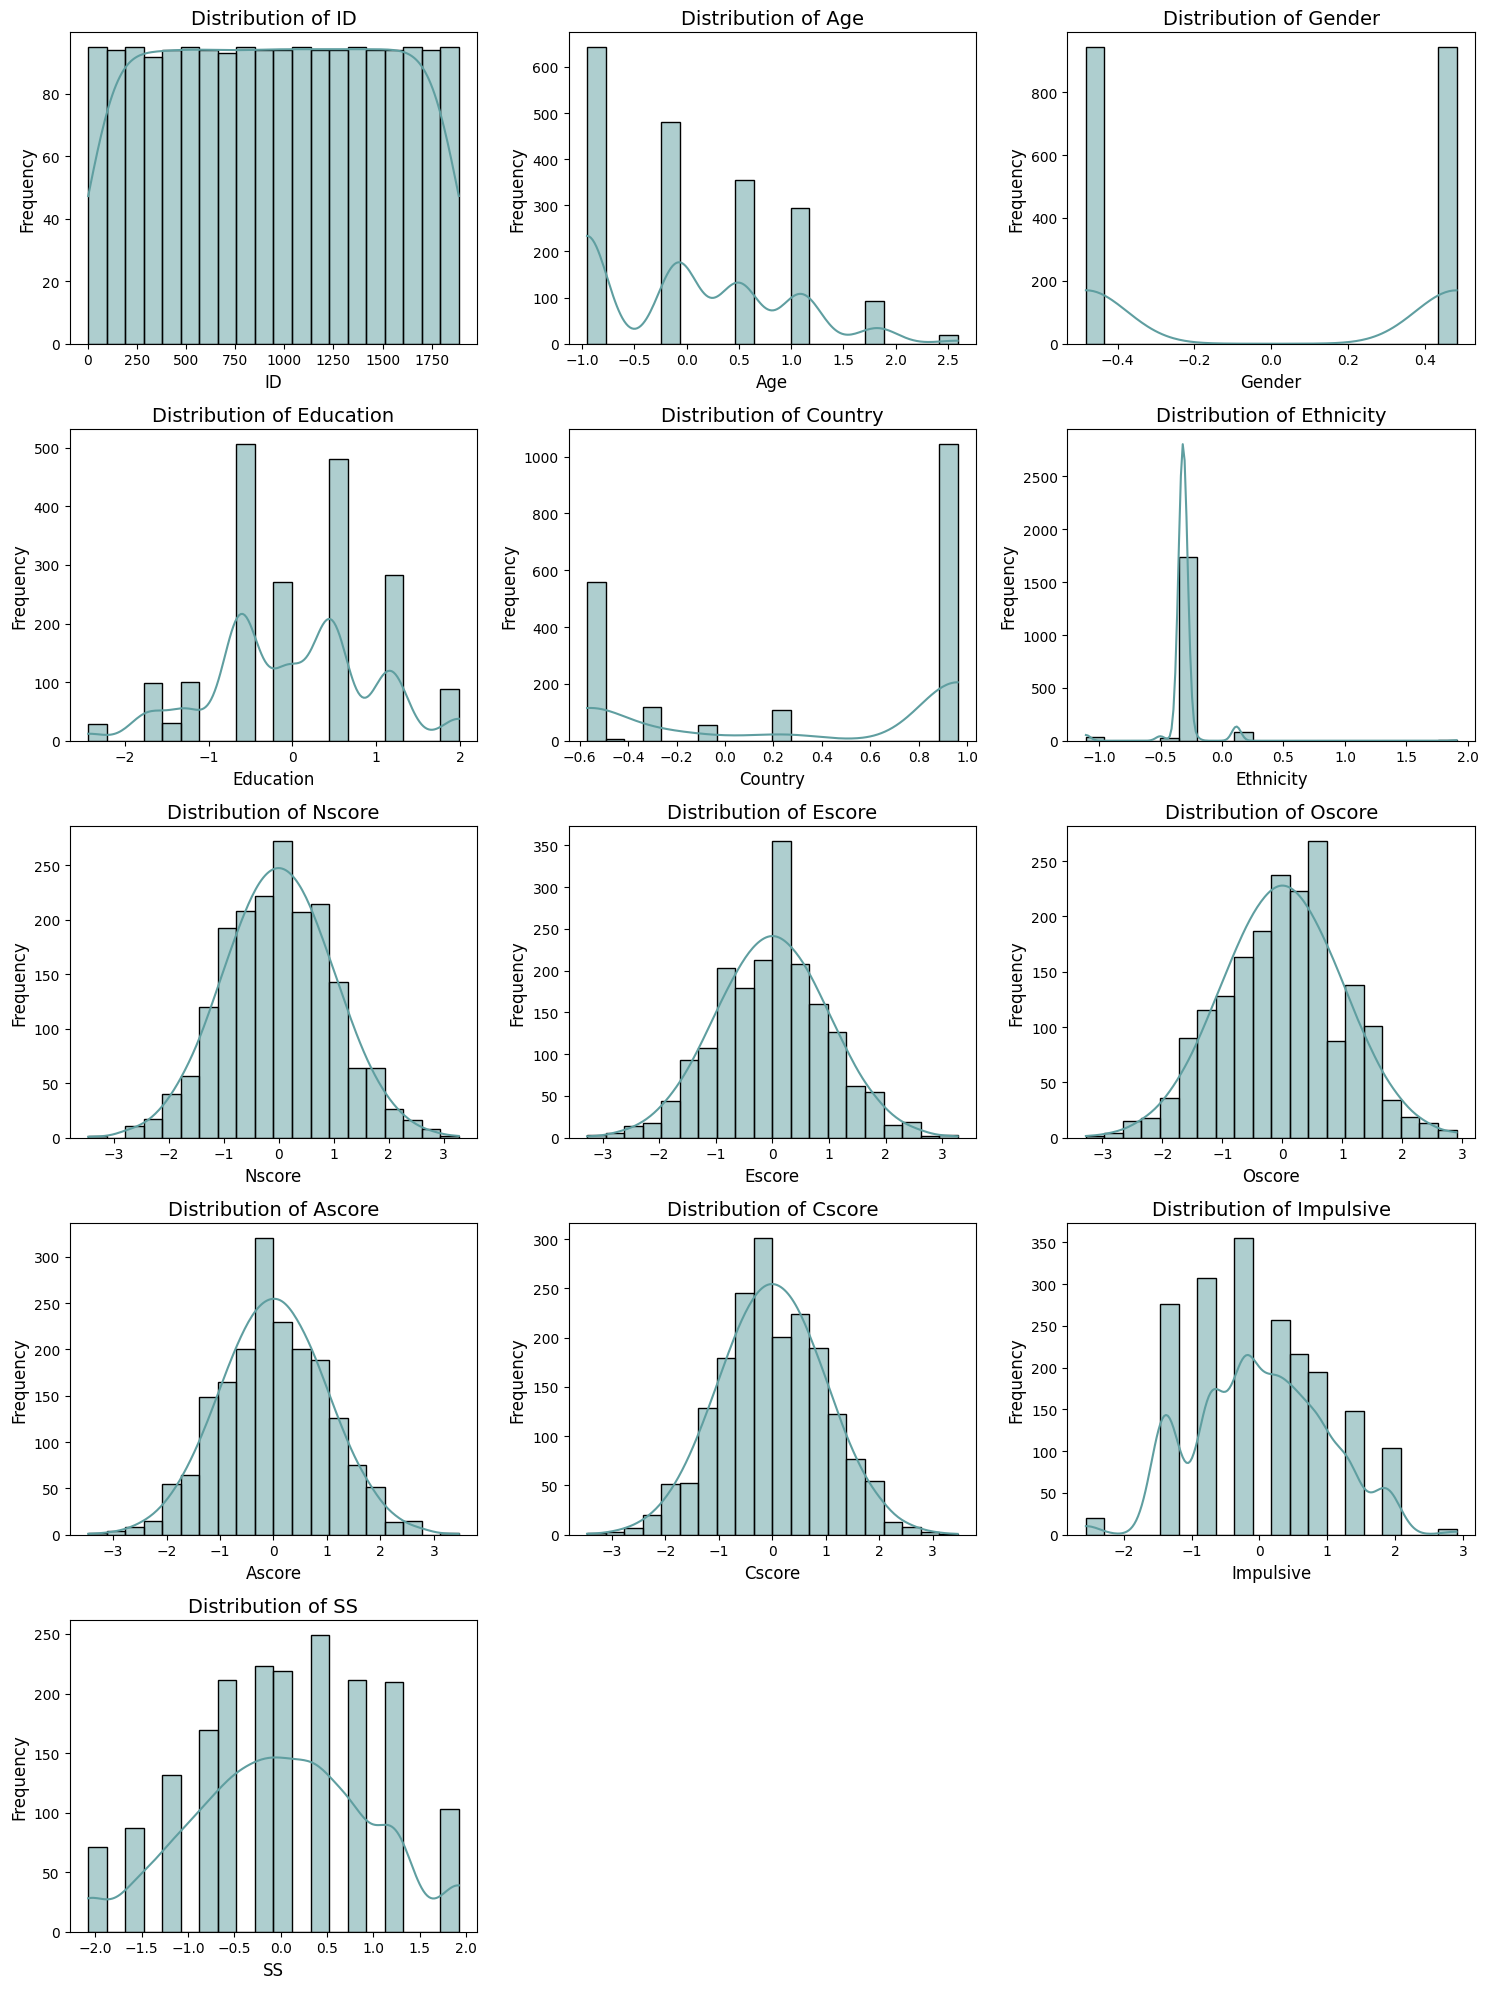

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

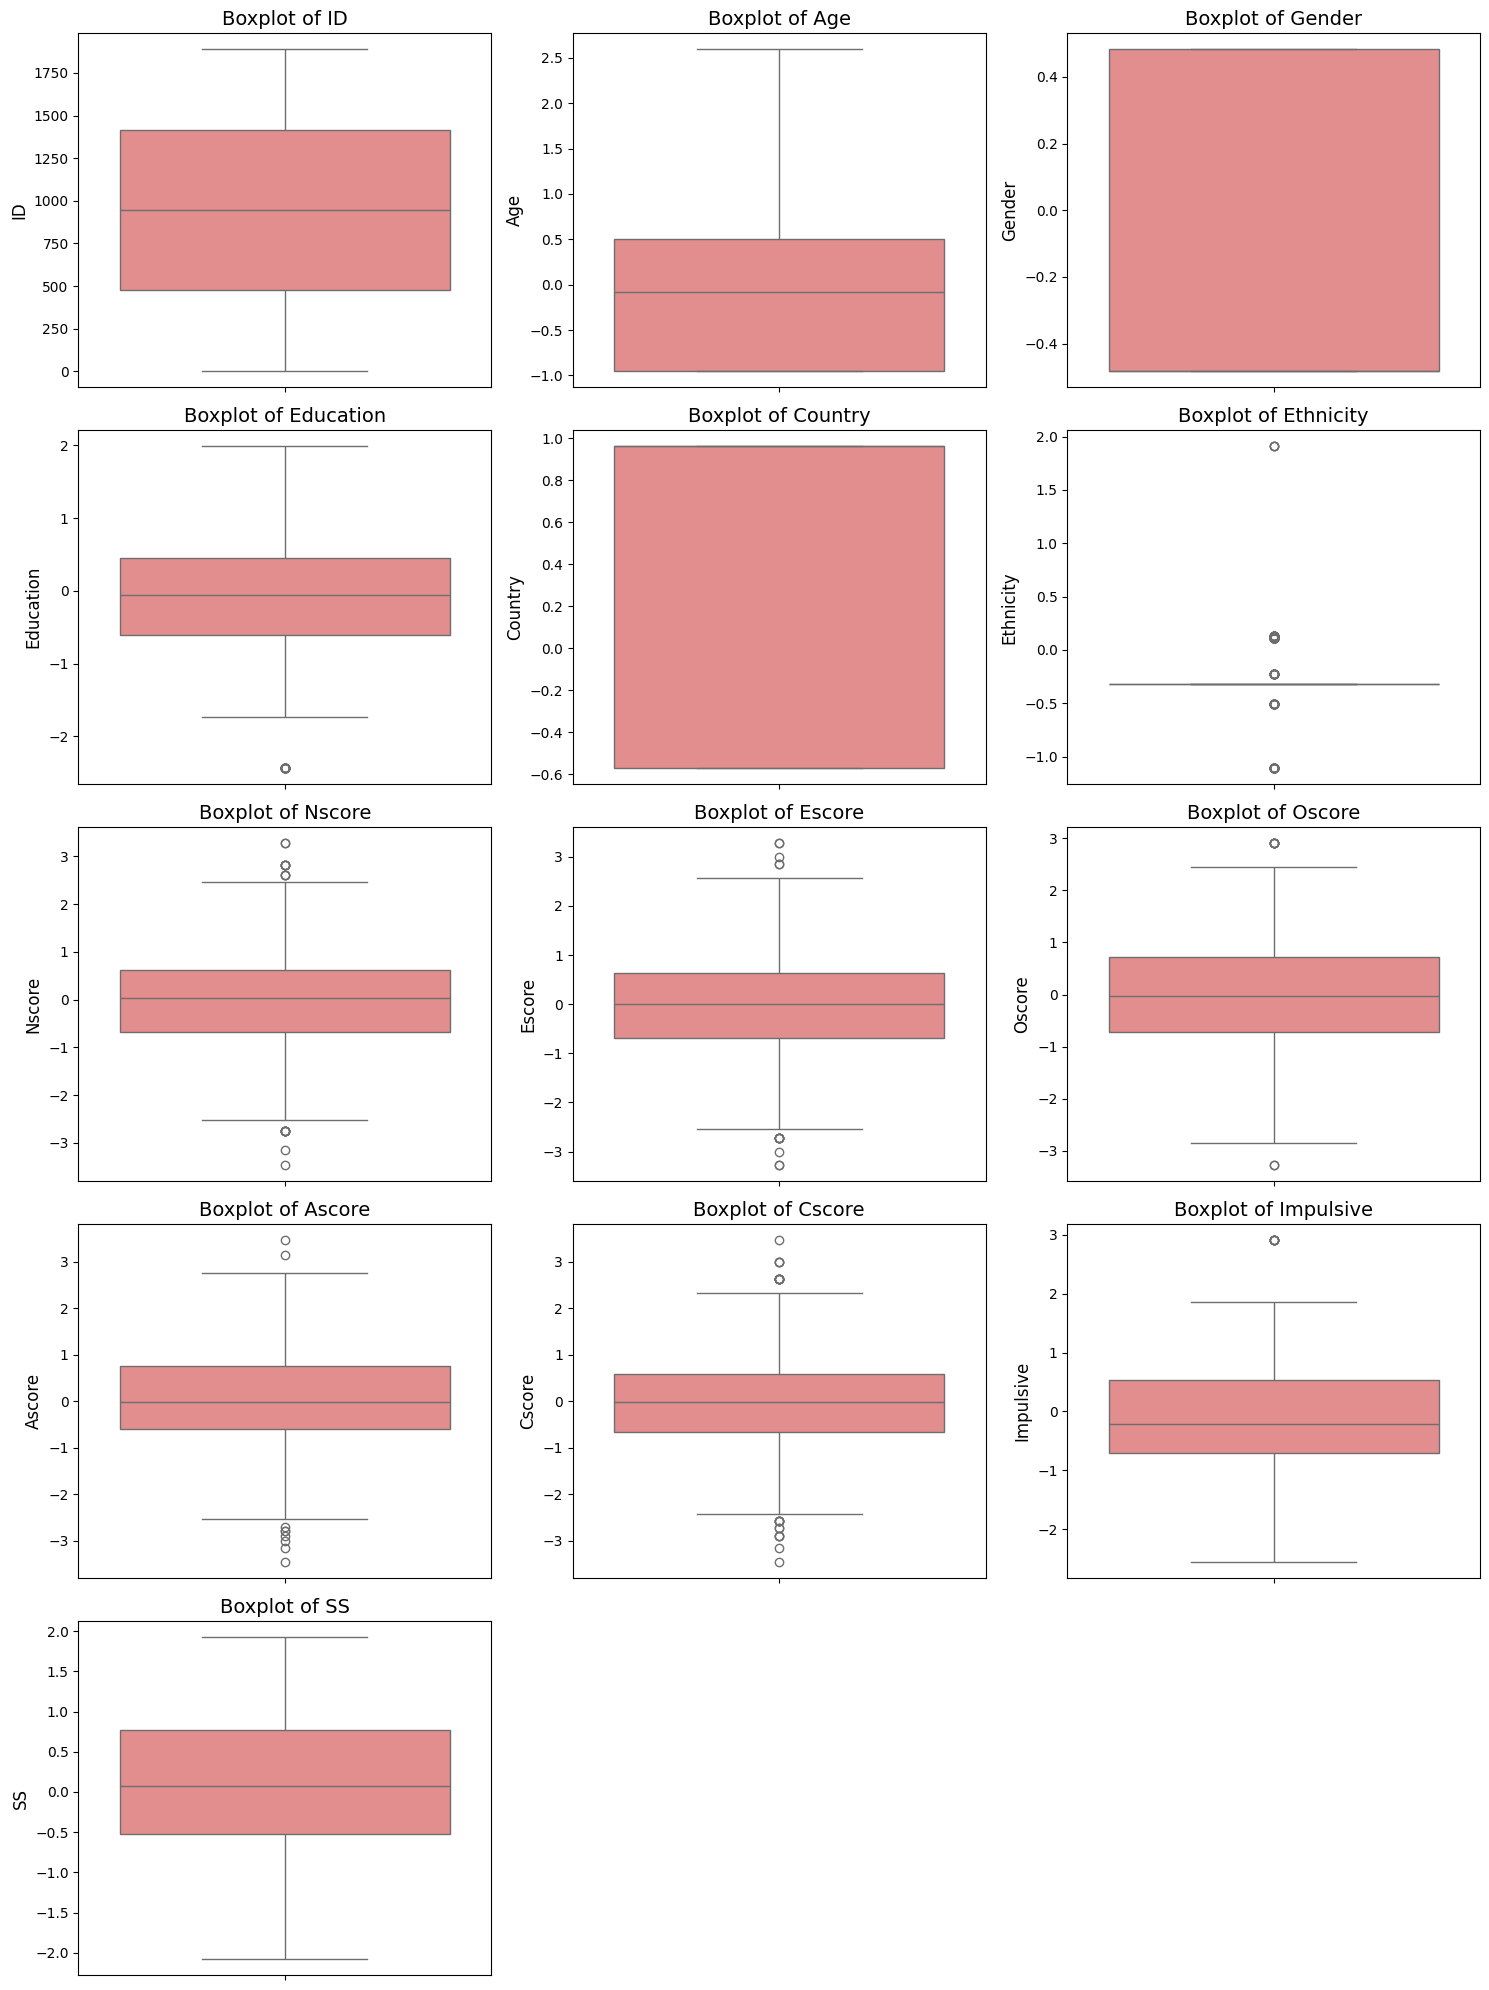

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

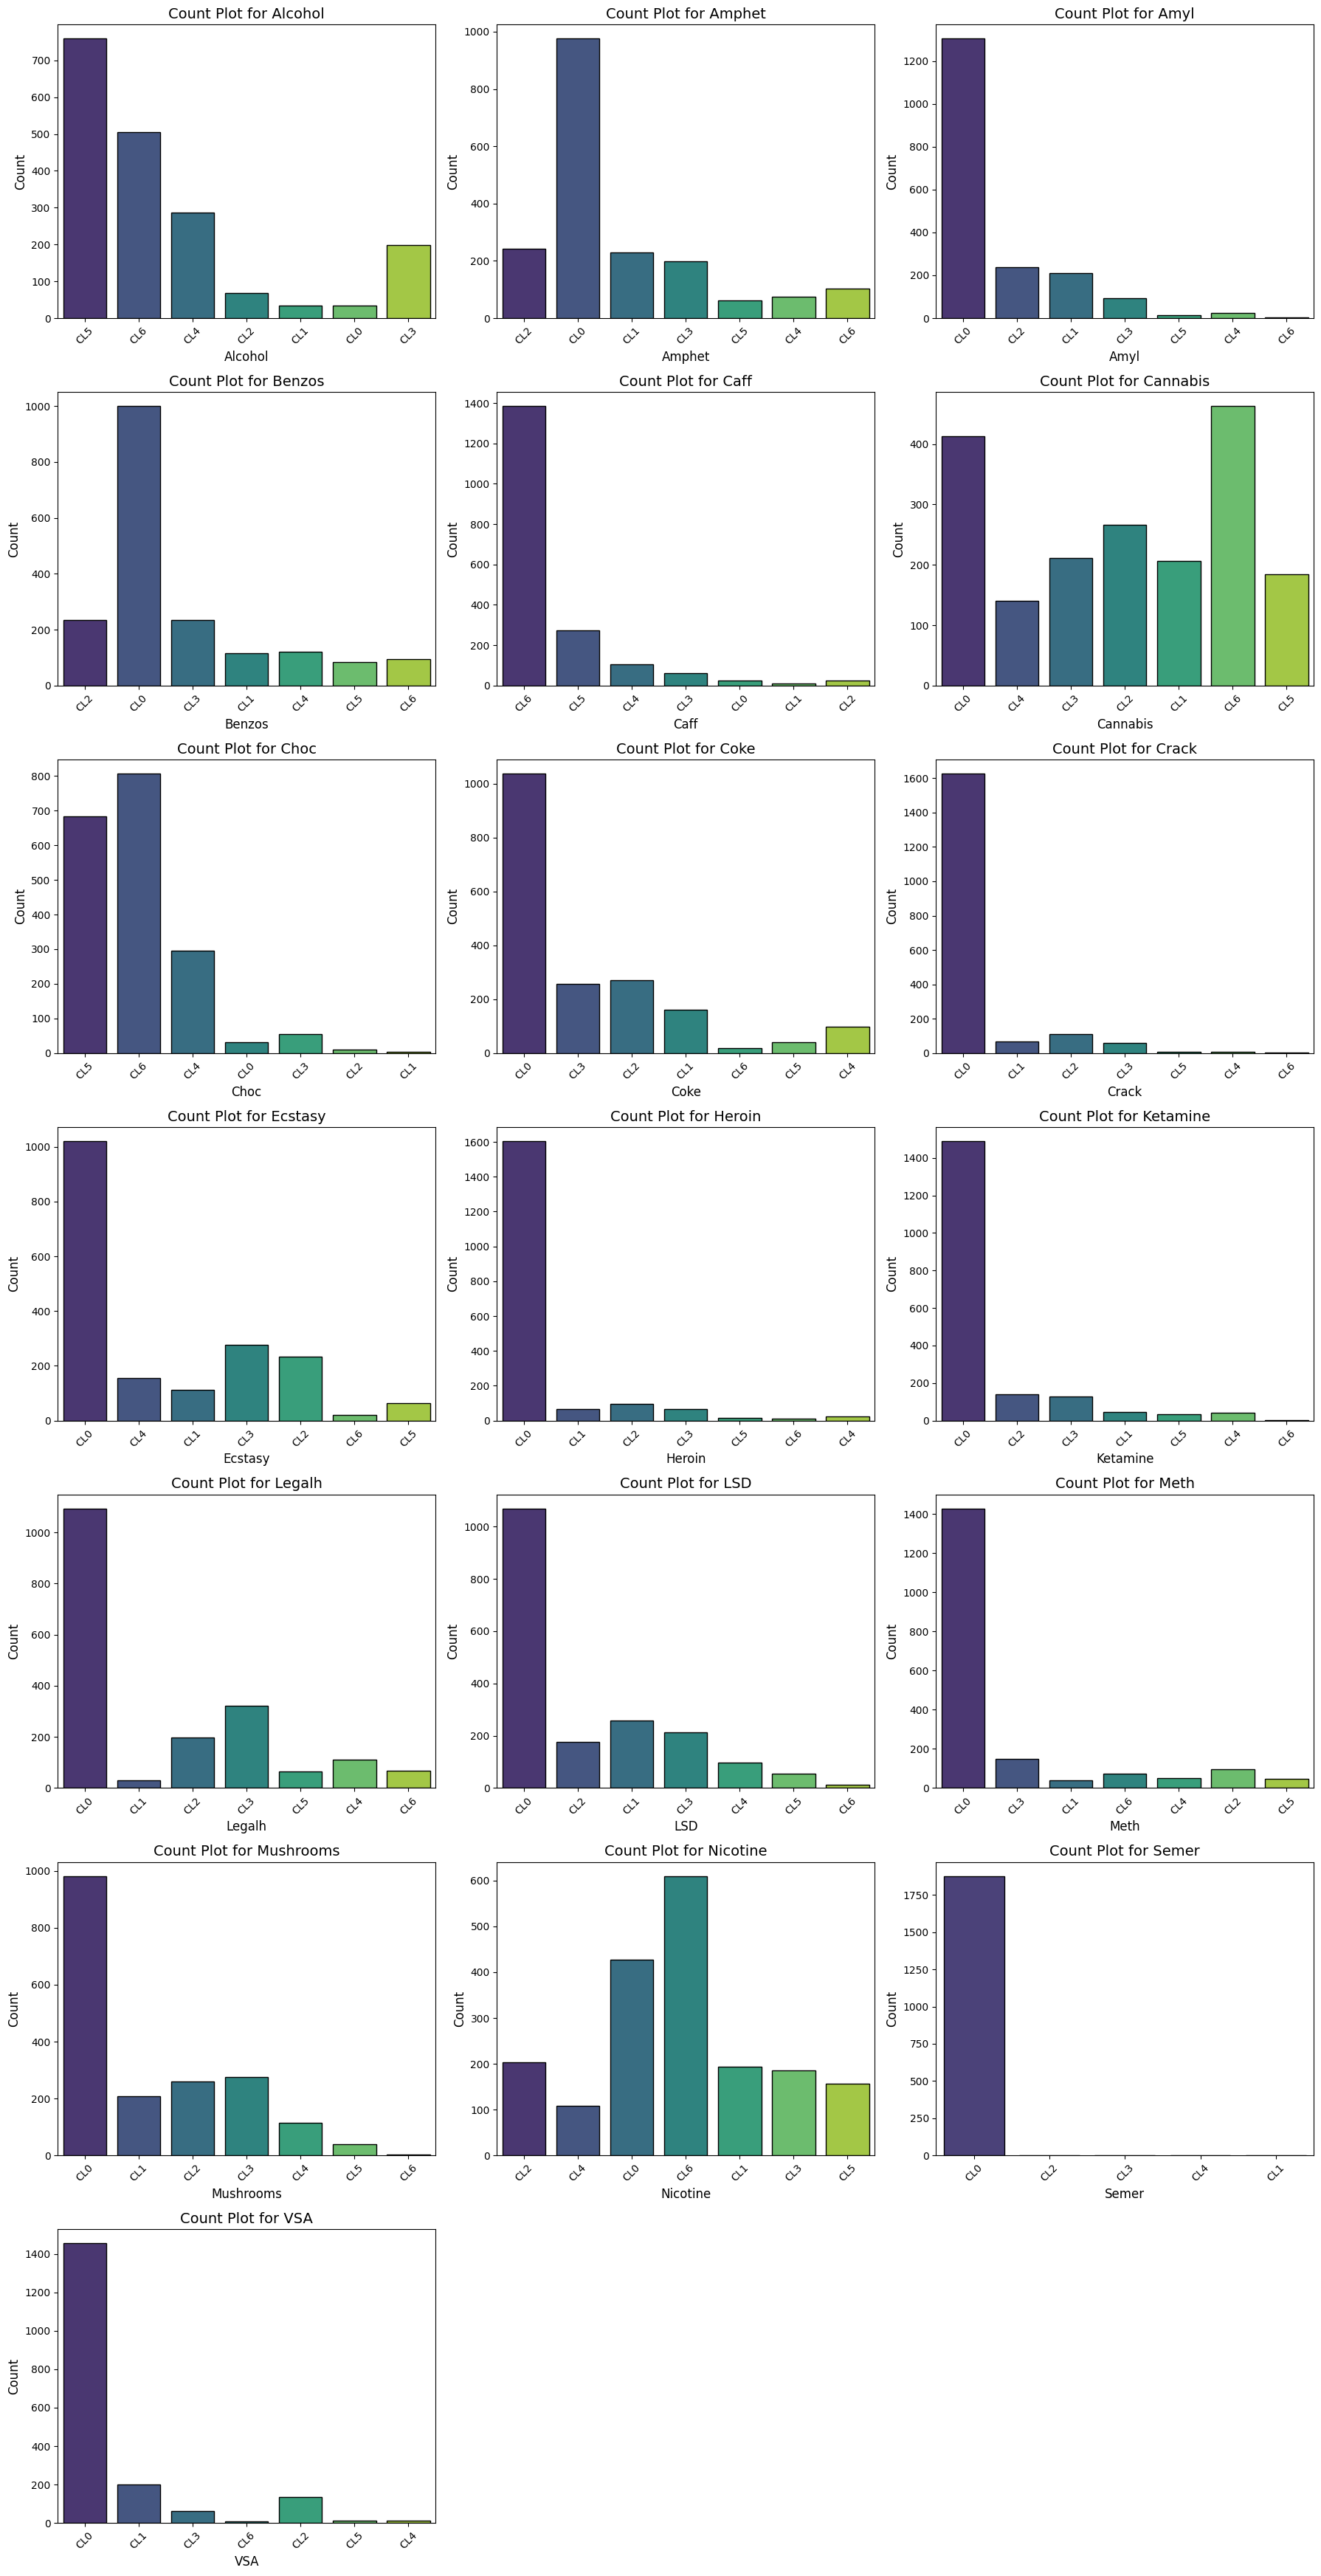

In [17]:
# Plotting each categorical column as a count plot

df.drop(columns=['ID'], inplace=True)

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], palette="viridis", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].set_title(f"Count Plot for {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preprocessing

In [49]:
def replace_clx(value):
  if value.startswith('CL'):
    return int(value[2:])
  else:
    return value
df['Nicotine'] = df['Nicotine'].apply(replace_clx)
df['Alcohol'] = df['Alcohol'].apply(replace_clx)

In [50]:
def replace_s(value):
  if value <= 2:
    return 0
  else:
    return 1
df['Nicotine'] = df['Nicotine'].apply(replace_s)

In [51]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [52]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
            'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol']
X = df[features]
y = df['Nicotine']

In [53]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [54]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [56]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7055702917771883, 0.7161803713527851, 0.6923076923076923, 0.7002652519893899, 0.6976127320954907, 0.7161803713527851, 0.6710875331564987, 0.6419098143236074, 0.7002652519893899]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       169
           1       0.72      0.76      0.74       208

    accuracy                           0.71       377
   macro avg       0.70      0.70      0.70       377
weighted avg       0.70      0.71      0.70       377

Confusion Matrix:
 [[108  61]
 [ 50 158]]


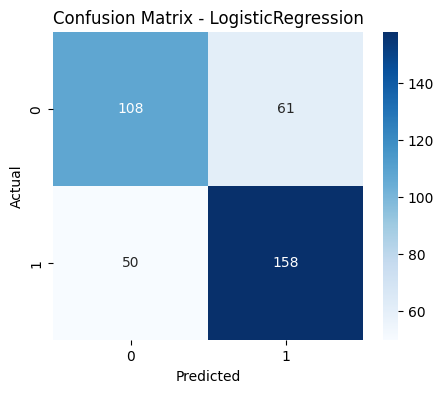

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67       169
           1       0.73      0.76      0.75       208

    accuracy                           0.72       377
   macro avg       0.71      0.71      0.71       377
weighted avg       0.72      0.72      0.72       377

Confusion Matrix:
 [[111  58]
 [ 49 159]]


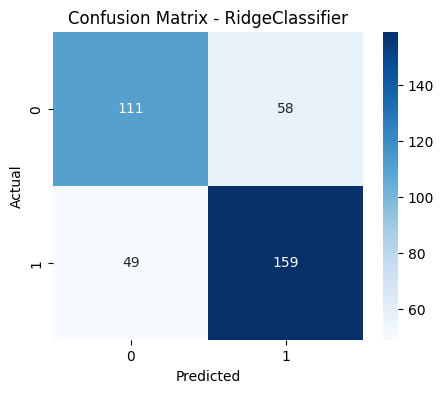

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       169
           1       0.71      0.75      0.73       208

    accuracy                           0.69       377
   macro avg       0.69      0.69      0.69       377
weighted avg       0.69      0.69      0.69       377

Confusion Matrix:
 [[106  63]
 [ 53 155]]


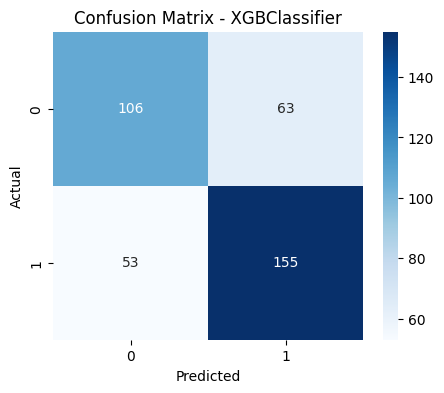

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.68       169
           1       0.73      0.79      0.76       208

    accuracy                           0.72       377
   macro avg       0.72      0.72      0.72       377
weighted avg       0.72      0.72      0.72       377

Confusion Matrix:
 [[109  60]
 [ 44 164]]


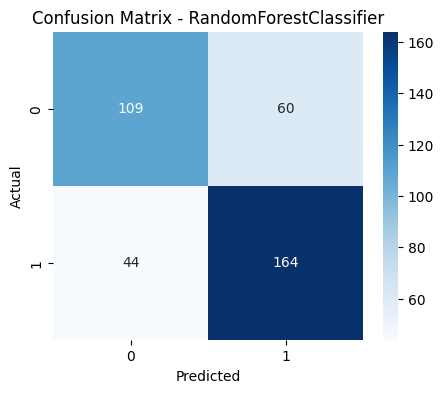

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       169
           1       0.72      0.74      0.73       208

    accuracy                           0.70       377
   macro avg       0.69      0.69      0.69       377
weighted avg       0.70      0.70      0.70       377

Confusion Matrix:
 [[110  59]
 [ 55 153]]


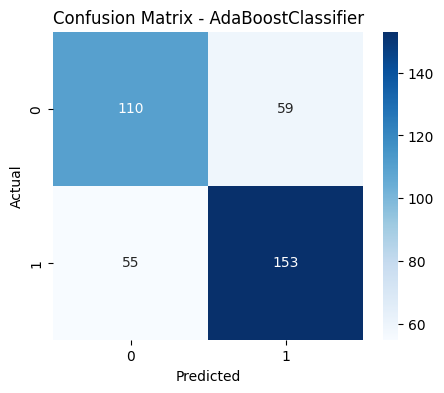

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.63      0.66       169
           1       0.72      0.79      0.75       208

    accuracy                           0.72       377
   macro avg       0.71      0.71      0.71       377
weighted avg       0.72      0.72      0.71       377

Confusion Matrix:
 [[106  63]
 [ 44 164]]


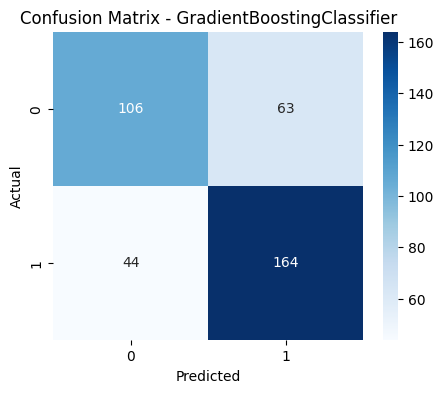

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.63      0.63       169
           1       0.70      0.68      0.69       208

    accuracy                           0.66       377
   macro avg       0.66      0.66      0.66       377
weighted avg       0.66      0.66      0.66       377

Confusion Matrix:
 [[107  62]
 [ 66 142]]


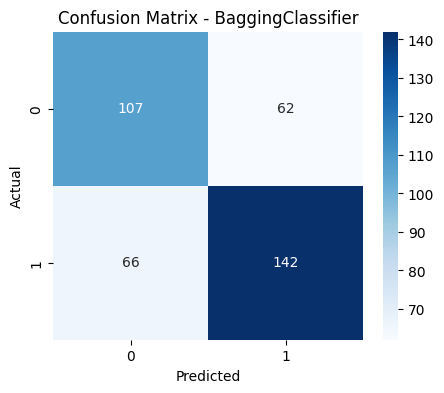

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59       169
           1       0.67      0.68      0.67       208

    accuracy                           0.63       377
   macro avg       0.63      0.63      0.63       377
weighted avg       0.63      0.63      0.63       377

Confusion Matrix:
 [[ 98  71]
 [ 67 141]]


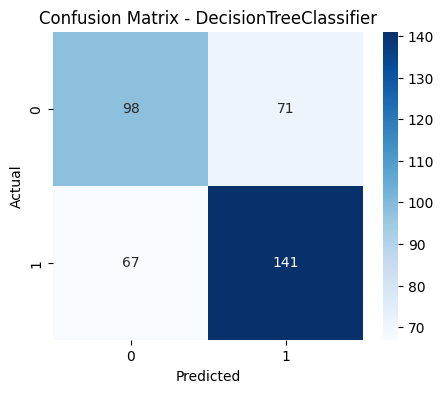

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       169
           1       0.72      0.75      0.73       208

    accuracy                           0.70       377
   macro avg       0.70      0.69      0.70       377
weighted avg       0.70      0.70      0.70       377

Confusion Matrix:
 [[108  61]
 [ 52 156]]


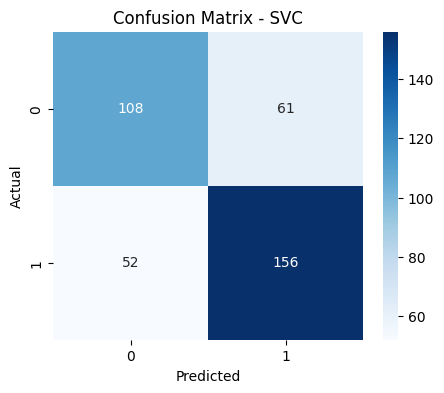

In [35]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()